**Loading Library**

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

**Fetching Dataset**

In [2]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'rec.autos','sci.space','alt.atheism','misc.forsale','rec.motorcycles','sci.crypt','rec.sport.baseball','comp.windows.x','sci.med']
twenty_news = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=62)

In [4]:
twenty_news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'sci.crypt',
 'sci.med',
 'sci.space']

In [5]:
len(twenty_news.data), len(twenty_news.filenames)

(9683, 9683)

In [6]:
len(twenty_news.target_names)

10

**Taking 30 Documents for Clustering**

In [92]:
#dataset = []
#target = []
#for i in range(0, 10):
#    document=0;
#    for j in range(0, 2950):
#        if(twenty_news.target[j] == i):
#            dataset.append(twenty_news.data[j])
#            target.append(i)
#            document = document + 1
#        if(document == 10):
#            break
# print('No. of documents:', len(dataset))

No. of documents: 100


**tf-idf and Clustering**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 0.05, max_features = 10000, stop_words = 'english', use_idf = True)
X = tfidf_vectorizer.fit_transform(twenty_news.data)
print("No. of samples : ", X.shape[0])
print("No. of feature : ", X.shape[1])

No. of samples :  9683
No. of feature :  219


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters


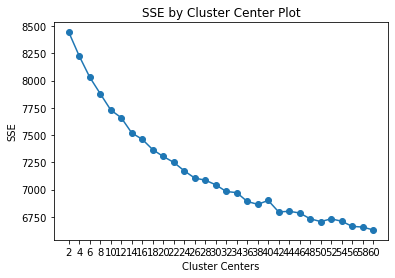

In [8]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1,2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X,60)

In [9]:
labels = twenty_news.target
clusters = np.unique(labels).shape[0]
print(clusters)
km = KMeans (n_clusters = clusters, init = 'k-means++', n_init = 1, verbose = 1, max_iter = 100)

print("Clustering sparse data with %s" % km)
km.fit(X)

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(clusters):
    print("Cluster %d:" % i, end='\n')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()
    print('\n')

10
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)
Initialization complete
Iteration  0, inertia 13671.984
Iteration  1, inertia 7990.156
Iteration  2, inertia 7885.825
Iteration  3, inertia 7830.368
Iteration  4, inertia 7808.733
Iteration  5, inertia 7785.855
Iteration  6, inertia 7762.703
Iteration  7, inertia 7751.847
Iteration  8, inertia 7746.686
Iteration  9, inertia 7742.559
Iteration 10, inertia 7734.851
Iteration 11, inertia 7724.593
Iteration 12, inertia 7720.759
Iteration 13, inertia 7720.077
Iteration 14, inertia 7719.900
Iteration 15, inertia 7719.806
Iteration 16, inertia 7719.769
Iteration 17, inertia 7719.753
Iteration 18, inertia 7719.749
Iteration 19, inertia 7719.748
Converged at iteration 19: center shift 0.000000e+00 within tolerance 4.070713e-07
Top terms per cluster:
Cluster 0:
 ca
 edu
 grap

In [10]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

Homogeneity: 0.120
Completeness: 0.135
V-measure: 0.127
